In [49]:
using Pkg
Pkg.activate("D:\\UTD\\UTDFall2021\\LoRa\\VariogramsLoRa\\firmware\\LoRa")

  Activating project at `D:\UTD\UTDFall2021\LoRa\VariogramsLoRa\firmware\LoRa`


In [50]:
using CSV,DataFrames, Dates, Statistics, GeoStats,DataStructures,Plots,TimeSeries,Distances

In [51]:
data_frame = CSV.read("D://UTD//UTDFall2021//LoRa//VariogramsLoRa//firmware//data//MINTS_001e06373996_IPS7100_2022_01_02.csv",DataFrame)
ms = [parse(Float64,x[20:26]) for x in data_frame[!,:dateTime]]
ms = string.(round.(ms,digits = 3)*1000)
ms = chop.(ms,tail= 2)
data_frame.dateTime =  chop.(data_frame.dateTime,tail= 6)
data_frame.dateTime = data_frame.dateTime.* ms
data_frame.dateTime = DateTime.(data_frame.dateTime,"yyyy-mm-dd HH:MM:SS.sss")
ls_index = findall(x-> Millisecond(500)<x<Millisecond(1500), diff(data_frame.dateTime))
df = data_frame[ls_index,:]

,dateTime,pc0_1,pc0_3,pc0_5,pc1_0,pc2_5,pc5_0,pc10_0,pm0_1
,DateTime,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2022-01-02T00:00:00.371,59429,38934,11406,994,461,0,0,0.0496572
2,2022-01-02T00:00:01.371,59120,39216,11440,1002,483,0,0,0.0493988
3,2022-01-02T00:00:02.370,59045,39594,11489,1015,512,0,0,0.049336
4,2022-01-02T00:00:03.372,59012,39696,11512,1025,533,3,0,0.0493084
5,2022-01-02T00:00:04.371,59199,39516,11531,1033,547,25,0,0.0494648
6,2022-01-02T00:00:05.371,59606,39651,11563,1040,558,45,0,0.0498048
7,2022-01-02T00:00:06.370,60205,40213,11603,1045,566,61,0,0.0503056
8,2022-01-02T00:00:07.369,60857,40779,11647,1052,571,66,0,0.0508503
9,2022-01-02T00:00:08.368,61528,41390,11713,1059,569,49,0,0.0514107


In [52]:
time_diff = (diff(data_frame.dateTime)/Millisecond(1000))/60
time_min = cumsum(time_diff)
time_min = pushfirst!(time_min, 0)
data_frame[!,"dateTime"] = time_min
data_frame

,dateTime,pc0_1,pc0_3,pc0_5,pc1_0,pc2_5,pc5_0,pc10_0,pm0_1,pm0_3
,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,0.0,59429,38934,11406,994,461,0,0,0.0496572,0.928014
2,0.0166667,59120,39216,11440,1002,483,0,0,0.0493988,0.934131
3,0.0333167,59045,39594,11489,1015,512,0,0,0.049336,0.942597
4,0.0500167,59012,39696,11512,1025,533,3,0,0.0493084,0.944865
5,0.0666667,59199,39516,11531,1033,547,25,0,0.0494648,0.940964
6,0.0833333,59606,39651,11563,1040,558,45,0,0.0498048,0.94435
7,0.0999833,60205,40213,11603,1045,566,61,0,0.0503056,0.957524
8,0.116633,60857,40779,11647,1052,571,66,0,0.0508503,0.970842
9,0.133283,61528,41390,11713,1059,569,49,0,0.0514107,0.985191


┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


PentasphericalVariogram(sill=0.00020290556999125707, nugget=0.0001756472667877959, range=32.499134821333044, metric=Euclidean)


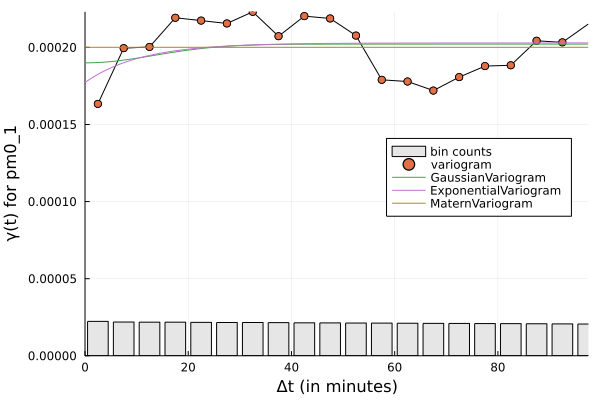

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


SphericalVariogram(sill=0.11823592094058505, nugget=0.08680787538891893, range=11.928801165045604, metric=Euclidean)


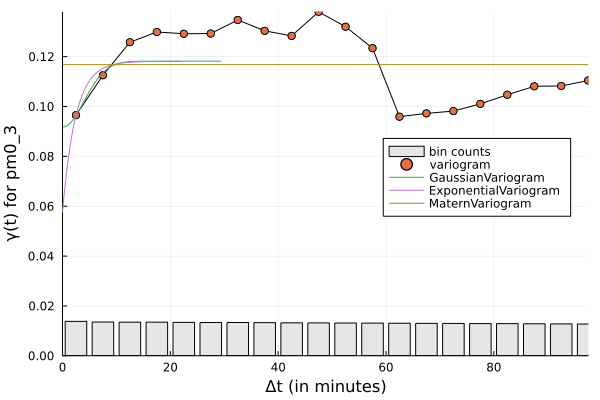

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


CubicVariogram(sill=0.3454435622251386, nugget=0.2036966192832228, range=24.799883384734564, metric=Euclidean)


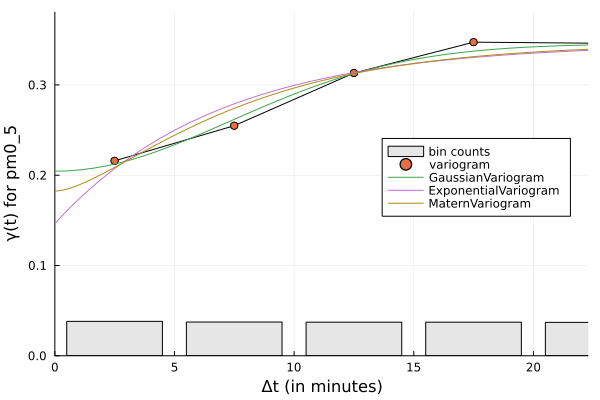

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


GaussianVariogram(sill=0.4018990593233917, nugget=0.22496288173910725, range=21.11926970703714, metric=Euclidean)


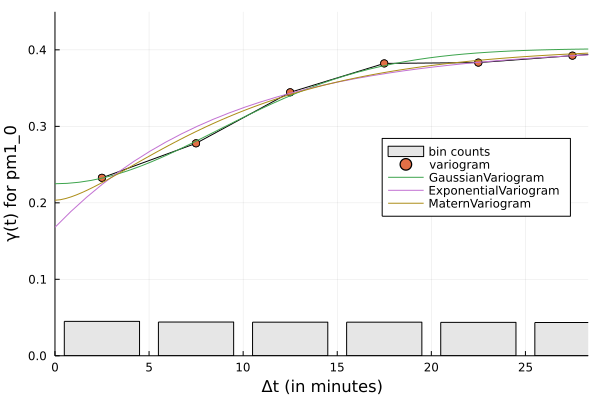

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


SineHoleVariogram(sill=7.427993801866496, nugget=6.170896775716742, range=26.730409419131988, metric=Euclidean)


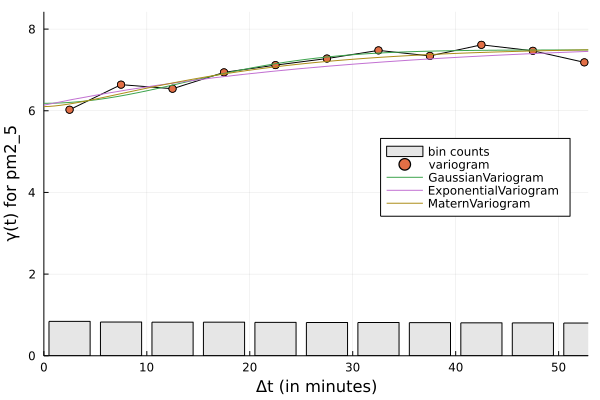

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


SineHoleVariogram(sill=9.646677688904223, nugget=8.138517011509908, range=26.928649760157047, metric=Euclidean)


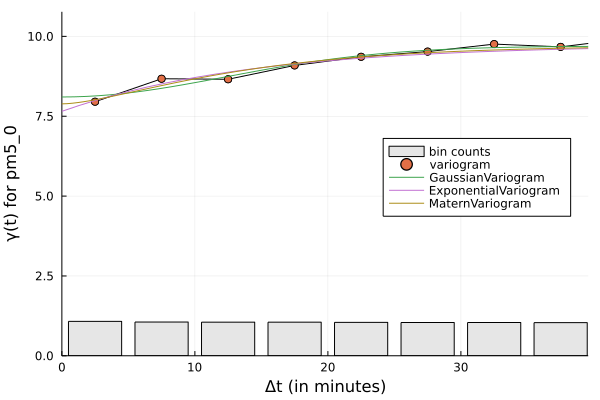

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


SineHoleVariogram(sill=9.738183870543018, nugget=8.224940366714685, range=26.947445923323162, metric=Euclidean)


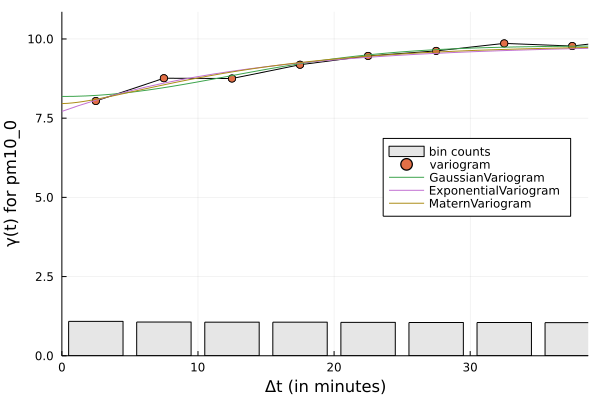

In [59]:
plot_array= Any[]
D = georef(data_frame, (:dateTime,))
for i in [:pm0_1,:pm0_3,:pm0_5,:pm1_0,:pm2_5,:pm5_0,:pm10_0]
    g = EmpiricalVariogram(D,i,maxlag = 100)
    #convergeregex = r:pm(\d+)_(\d+)
    #matches = match(convergeregex, i).captures[1]*"."*match(convergeregex, i).captures[2]
    #println(matches)
    γs = [fit(V, g) for V in [GaussianVariogram, ExponentialVariogram, MaternVariogram]]

    # plot all models
    p = plot(g)
    for γ in γs
        plot!(γ, maxlag=3.,legend=:right,ylabel = "γ(t) for "*string(i),xlabel = "Δt (in minutes)")
    end
    γₒ = fit(Variogram, g)
    println(γₒ)
    display(p)
    push!(plot_array,Plots.plot(p,legend=:right, ylabel = "γ(t) for"*string(i) ))

end



┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


CubicVariogram(sill=0.3454435622251386, nugget=0.2036966192832228, range=24.799883384734564, metric=Euclidean)


┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


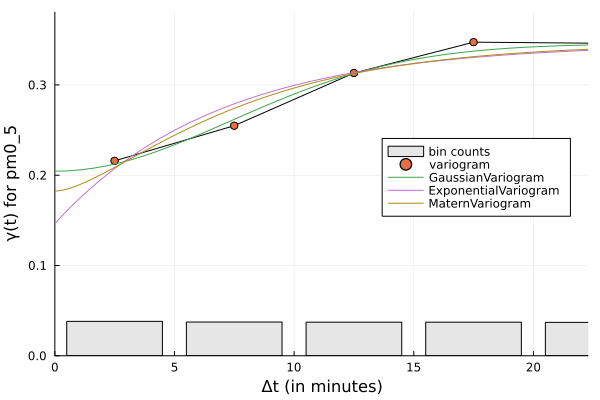

In [54]:
γₒ = 0
plot_array= Any[]
D = georef(data_frame, (:dateTime,))
for i in [:pm0_5]
    g = EmpiricalVariogram(D,i,maxlag = 100)
    #convergeregex = r:pm(\d+)_(\d+)
    #matches = match(convergeregex, i).captures[1]*"."*match(convergeregex, i).captures[2]
    #println(matches)
    γs = [fit(V, g) for V in [GaussianVariogram, ExponentialVariogram, MaternVariogram]]

    # plot all models
    p = plot(g)
    γₒ = fit(Variogram, g)
    for γ in γs
        plot!(γ, maxlag=3.,legend=:right,ylabel = "γ(t) for "*string(i),xlabel = "Δt (in minutes)")
    end
    #γₒ = fit(Variogram, g)
    println(γₒ)
    display(p)
    push!(plot_array,Plots.plot(p,legend=:right, ylabel = "γ(t) for"*string(i) ))

end


┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


GaussianVariogram(sill=0.4018990593233917, nugget=0.22496288173910725, range=21.11926970703714, metric=Euclidean)


┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


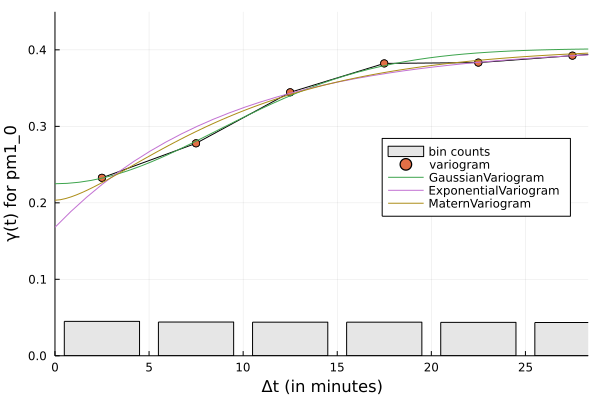

In [57]:
γₒ = 0
plot_array= Any[]
D = georef(data_frame, (:dateTime,))
for i in [:pm1_0]
    g = EmpiricalVariogram(D,i,maxlag = 100)
    #convergeregex = r:pm(\d+)_(\d+)
    #matches = match(convergeregex, i).captures[1]*"."*match(convergeregex, i).captures[2]
    #println(matches)
    γs = [fit(V, g) for V in [GaussianVariogram, ExponentialVariogram, MaternVariogram]]

    # plot all models
    p = plot(g)
    γₒ = fit(Variogram, g)
    for γ in γs
        plot!(γ, maxlag=3.,legend=:right,ylabel = "γ(t) for "*string(i),xlabel = "Δt (in minutes)")
    end
    #γₒ = fit(Variogram, g)
    println(γₒ)
    display(p)
    push!(plot_array,Plots.plot(p,legend=:right, ylabel = "γ(t) for"*string(i) ))

end

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


SineHoleVariogram(sill=7.427993801866496, nugget=6.170896775716742, range=26.730409419131988, metric=Euclidean)


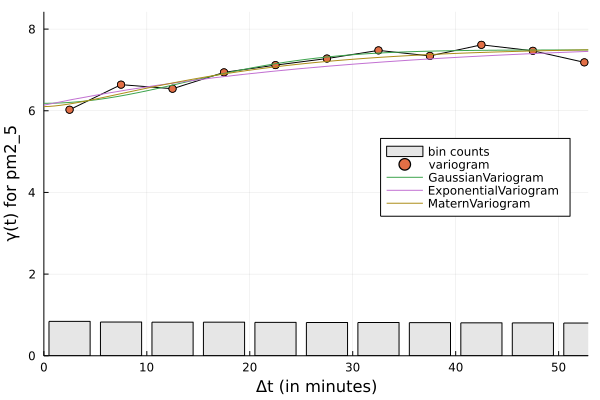

In [56]:
γₒ = 0
plot_array= Any[]
D = georef(data_frame, (:dateTime,))
for i in [:pm2_5]
    g = EmpiricalVariogram(D,i,maxlag = 100)
    #convergeregex = r:pm(\d+)_(\d+)
    #matches = match(convergeregex, i).captures[1]*"."*match(convergeregex, i).captures[2]
    #println(matches)
    γs = [fit(V, g) for V in [GaussianVariogram, ExponentialVariogram, MaternVariogram]]

    # plot all models
    p = plot(g)
    γₒ = fit(Variogram, g)
    for γ in γs
        plot!(γ, maxlag=3.,legend=:right,ylabel = "γ(t) for "*string(i),xlabel = "Δt (in minutes)")
    end
    #γₒ = fit(Variogram, g)
    println(γₒ)
    display(p)
    push!(plot_array,Plots.plot(p,legend=:right, ylabel = "γ(t) for"*string(i) ))

end

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


SineHoleVariogram(sill=9.646677688904223, nugget=8.138517011509908, range=26.928649760157047, metric=Euclidean)


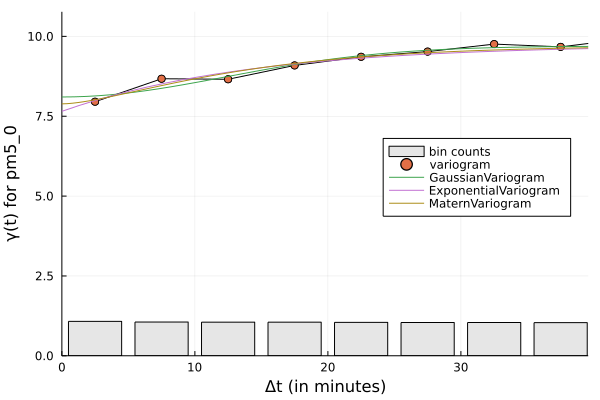

┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267
┌ Warning: duplicate coordinates found
└ @ Variography C:\Users\balag\.julia\packages\Variography\gEhqn\src\empirical.jl:267


SineHoleVariogram(sill=9.738183870543018, nugget=8.224940366714685, range=26.947445923323162, metric=Euclidean)


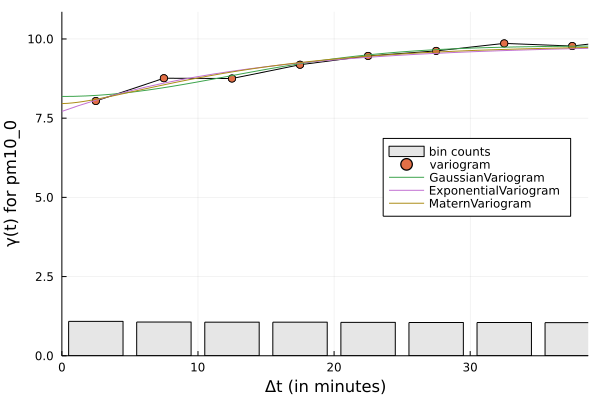

In [58]:
plot_array= Any[]
D = georef(data_frame, (:dateTime,))
for i in [:pm5_0,:pm10_0]
    g = EmpiricalVariogram(D,i,maxlag = 100)
    #convergeregex = r:pm(\d+)_(\d+)
    #matches = match(convergeregex, i).captures[1]*"."*match(convergeregex, i).captures[2]
    #println(matches)
    γs = [fit(V, g) for V in [GaussianVariogram, ExponentialVariogram, MaternVariogram]]

    # plot all models
    p = plot(g)
    for γ in γs
        plot!(γ, maxlag=3.,legend=:right,ylabel = "γ(t) for "*string(i),xlabel = "Δt (in minutes)")
    end
    γₒ = fit(Variogram, g)
    println(γₒ)
    display(p)
    push!(plot_array,Plots.plot(p,legend=:right, ylabel = "γ(t) for"*string(i) ))

end



In [ ]:
γₒ = 0
plot_array= Any[]
D = georef(data_frame, (:dateTime,))
for i in [:pm1_0]
    g = EmpiricalVariogram(D,i,maxlag = 100)
    #convergeregex = r:pm(\d+)_(\d+)
    #matches = match(convergeregex, i).captures[1]*"."*match(convergeregex, i).captures[2]
    #println(matches)
    γs = [fit(V, g) for V in [GaussianVariogram, ExponentialVariogram, MaternVariogram]]

    # plot all models
    p = plot(g)
    γₒ = fit(Variogram, g)
    for γ in γs
        plot!(γ, maxlag=3.,legend=:right,ylabel = "γ(t) for "*string(i),xlabel = "Δt (in minutes)")
    end
    #γₒ = fit(Variogram, g)
    println(γₒ)
    display(p)
    push!(plot_array,Plots.plot(p,legend=:right, ylabel = "γ(t) for"*string(i) ))

end

# Manually Creating a Variogram

In [43]:
data_frame = CSV.read("D://UTD//UTDFall2021//LoRa//VariogramsLoRa//firmware//data//MINTS_001e06373996_IPS7100_2022_01_02.csv",DataFrame)
ms = [parse(Float64,x[20:26]) for x in data_frame[!,:dateTime]]
ms = string.(round.(ms,digits = 3)*1000)
ms = chop.(ms,tail= 2)
data_frame.dateTime =  chop.(data_frame.dateTime,tail= 6)
data_frame.dateTime = data_frame.dateTime.* ms
data_frame.dateTime = DateTime.(data_frame.dateTime,"yyyy-mm-dd HH:MM:SS.sss")
data_frame
ls_index = findall(x-> Millisecond(500)<x<Millisecond(1500), diff(data_frame.dateTime))
df = data_frame[ls_index,:]

,dateTime,pc0_1,pc0_3,pc0_5,pc1_0,pc2_5,pc5_0,pc10_0,pm0_1
,DateTime,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2022-01-02T00:00:00.371,59429,38934,11406,994,461,0,0,0.0496572
2,2022-01-02T00:00:01.371,59120,39216,11440,1002,483,0,0,0.0493988
3,2022-01-02T00:00:02.370,59045,39594,11489,1015,512,0,0,0.049336
4,2022-01-02T00:00:03.372,59012,39696,11512,1025,533,3,0,0.0493084
5,2022-01-02T00:00:04.371,59199,39516,11531,1033,547,25,0,0.0494648
6,2022-01-02T00:00:05.371,59606,39651,11563,1040,558,45,0,0.0498048
7,2022-01-02T00:00:06.370,60205,40213,11603,1045,566,61,0,0.0503056
8,2022-01-02T00:00:07.369,60857,40779,11647,1052,571,66,0,0.0508503
9,2022-01-02T00:00:08.368,61528,41390,11713,1059,569,49,0,0.0514107


In [44]:
avg_lag = Any[]
for i=1:1:200
    time_head = df[1:80000,:dateTime]
    time_tail = df[i+1:80000+i,:dateTime]
    time_diff = (time_tail - time_head)/Millisecond(1000)
    append!(avg_lag ,(sum(time_diff)/80000)/60)
end 

In [45]:
n = names(df)[9:15]

7-element Vector{String}:
 "pm0_1"
 "pm0_3"
 "pm0_5"
 "pm1_0"
 "pm2_5"
 "pm5_0"
 "pm10_0"

In [46]:
γh = DataFrame()
γ = []
for k in n
    for i = 1:1:200
        df_head = df[1:80000,k]
        df_tail = df[i+1:80000+i,k]
        head_tail_diff = df_head - df_tail
        append!(γ,sum(head_tail_diff.^2)/(2*80000))
    end
    γh[!,k] = γ
    γ = []   
end

println(γh)

200×7 DataFrame
 Row │ pm0_1        pm0_3        pm0_5        pm1_0        pm2_5      pm5_0     pm10_0   
     │ Any          Any          Any          Any          Any        Any       Any      
─────┼───────────────────────────────────────────────────────────────────────────────────
   1 │ 5.0627e-7    0.000317801  0.000790336  0.000833781  0.0367957  0.104677  0.109269
   2 │ 1.8831e-6    0.00121377   0.00293391   0.00309753   0.136531   0.366162  0.381427
   3 │ 3.99436e-6   0.00260007   0.00622144   0.00656907   0.286974   0.72022   0.746134
   4 │ 6.70161e-6   0.00438624   0.0104372    0.0110193    0.47661    1.11388   1.14847
   5 │ 9.86742e-6   0.00648282   0.0153659    0.0162197    0.694172   1.50926   1.55005
   6 │ 1.3355e-5    0.00880082   0.0207934    0.0219432    0.927946   1.89162   1.93748
   7 │ 1.70284e-5   0.0112508    0.0265047    0.0279622    1.16758    2.25473   2.30509
   8 │ 2.07537e-5   0.0137434    0.0322869    0.0340515    1.4036     2.59248   2.64689
   9 │ 

 200 │ 0.000164484  0.120067     0.268611     0.288079     6.3185     8.21992   8.29994


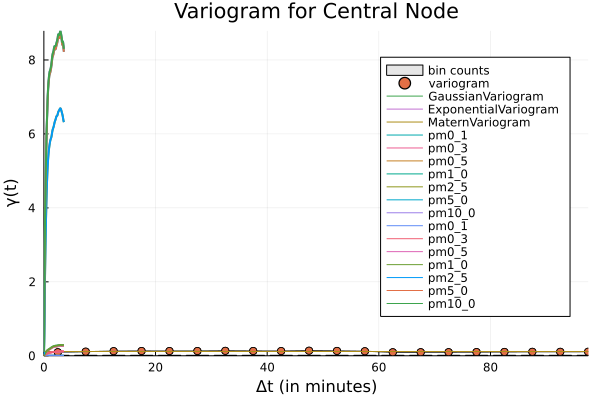

In [47]:
p=0
for c in names(γh)
   p = plot!(avg_lag,γh[!,c],linewidth=2,xlabel = "Δt (in minutes)", legend=:right, ylabel = "γ(t)", label=c, title = "Variogram for Central Node")
end
display(p)